# Jupyter notebook 2 

# Model 1. Linear model with SGDRegressor

## Simon Kennedy

## Load the clean pre-processed dataset

In [1]:
import numpy as np
import pandas as pd

cancer_df = pd.DataFrame(pd.read_csv("cancer_clean.csv"))
cancer_df.head()     

,avgAnnCount,TARGET_deathRate,incidenceRate,povertyPercent,studyPerCap,binnedInc,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,...,PctPrivateCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,State
0,1397.0,164.9,489.8,11.2,499.748204,10,36.9,41.7,2.54,52.5,...,75.1,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,47
1,173.0,161.3,411.6,18.6,23.111234,7,32.2,33.7,2.34,44.5,...,70.2,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,47
2,102.0,174.7,349.7,14.6,47.560164,7,44.0,45.8,2.62,54.2,...,63.7,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,47
3,427.0,194.8,430.4,17.1,342.637253,5,42.2,43.4,2.52,52.7,...,58.4,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,47
4,57.0,144.4,350.1,12.5,0.000000,7,47.8,48.9,2.34,57.8,...,61.6,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,47


## Splitting the dataset into Training and Tesing data

### Data Segregation

In [2]:
X = cancer_df.drop(columns = ['TARGET_deathRate'])
y = cancer_df['TARGET_deathRate']

X.shape, y.shape

((3009, 26), (3009,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
# test_size is default 0.25 if train_size also none. i.e. train = 0.75, train = 0.25
#defining a seed to get the same split in the data
print(X_train.shape)
print(X_test.shape)

(2256, 26)
(753, 26)


## k fold cross-validation to split the data

In [18]:
# Creating the K-Fold ojbect
from sklearn.model_selection import KFold
cv_method = KFold(n_splits = 3) 

# Performing the K-Fold Cross-Validation
for train_index, test_index in cv_method.split(cancer_df):
    
    # Obtaining the index for the training and test sets for the subset
    print("First five train index:", train_index[0:5], "First five test index:", test_index[0:5])
    print('Shape of the Training set:', train_index.shape, 'Shape of the Test set:',test_index.shape, '\n')

First five train index: [1003 1004 1005 1006 1007] First five test index: [0 1 2 3 4]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 

First five train index: [0 1 2 3 4] First five test index: [1003 1004 1005 1006 1007]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 

First five train index: [0 1 2 3 4] First five test index: [2006 2007 2008 2009 2010]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 



# Data Modeling

## Model 1. Linear model with SGDRegressor

#### Defining the model with scaling and then fitting the model

In [19]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# make the pipeline
linear_model = make_pipeline(MinMaxScaler(),
                      SGDRegressor(max_iter=1000))
linear_model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdregressor', SGDRegressor())])

#### Getting the MSE and RMSE of the predictions

In [20]:
from sklearn.metrics import mean_squared_error

# predicting on the training data
y_train_predict = linear_model.predict(X_train)
# predicting on the test data
y_test_predict = linear_model.predict(X_test)

MSE_linear_train = mean_squared_error(y_train, y_train_predict)
RMSE_linear_train = np.sqrt(MSE_linear_train)
MSE_linear_test = mean_squared_error(y_test, y_test_predict)
RMSE_linear_test = np.sqrt(MSE_linear_test)

print('The linear model with SGD regressor Mean Square Error on training data is : ', MSE_linear_train)
print('The linear model with SGD regressor RMSE on training data is ', RMSE_linear_train)
print('The linear model with SGD regressor Mean Square Error on test data is : ', MSE_linear_test)
print('The linear model with SGD regressor RMSE on test data is ', RMSE_linear_test)

The linear model with SGD regressor Mean Square Error on training data is :  403.9267712662428
The linear model with SGD regressor RMSE on training data is  20.09792952685034
The linear model with SGD regressor Mean Square Error on test data is :  422.21192634905447
The linear model with SGD regressor RMSE on test data is  20.547796143359378


The RMSE of the test data is slightly greater than on the training data as expected.

# Hyperparameter tuning

## Creating the parameter grid and using GridSearchCV to find the best parameters

In [21]:
linear_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'minmaxscaler', 'sgdregressor', 'minmaxscaler__clip', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'sgdregressor__alpha', 'sgdregressor__average', 'sgdregressor__early_stopping', 'sgdregressor__epsilon', 'sgdregressor__eta0', 'sgdregressor__fit_intercept', 'sgdregressor__l1_ratio', 'sgdregressor__learning_rate', 'sgdregressor__loss', 'sgdregressor__max_iter', 'sgdregressor__n_iter_no_change', 'sgdregressor__penalty', 'sgdregressor__power_t', 'sgdregressor__random_state', 'sgdregressor__shuffle', 'sgdregressor__tol', 'sgdregressor__validation_fraction', 'sgdregressor__verbose', 'sgdregressor__warm_start'])

In [22]:
from sklearn.model_selection import GridSearchCV
#hyperparameters to calibrate
param_grid = {
    'sgdregressor__loss': [ 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'sgdregressor__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdregressor__alpha': [0.0001, 0.05],
    'sgdregressor__l1_ratio': [0.15, 0.5, 0.75] 
}
#searching for the optimal parameter from param_grid
grid_linear = GridSearchCV(linear_model, param_grid, cv=cv_method, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2) #
%time grid_linear.fit(X_train, y_train)
print('best parameters for linear model', grid_linear.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Wall time: 5.84 s
best parameters for linear model {'sgdregressor__alpha': 0.0001, 'sgdregressor__l1_ratio': 0.75, 'sgdregressor__loss': 'squared_epsilon_insensitive', 'sgdregressor__penalty': 'l1'}


#### Assigning the best parameters to the SVR model using grid.best_estimator_

In [23]:
linear_tuned = grid_linear.best_estimator_
linear_tuned 

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdregressor',
                 SGDRegressor(l1_ratio=0.75, loss='squared_epsilon_insensitive',
                              penalty='l1'))])

#### Getting the performance of the TUNED model on the training and testing data

In [24]:
# predicting on the training data
y_tuned_train_predict = linear_tuned.predict(X_train)
# predicting on the test data
y_tuned_test_predict = linear_tuned.predict(X_test)

MSE_linear_tuned_train = mean_squared_error(y_train, y_tuned_train_predict)
RMSE_linear_tuned_train = np.sqrt(MSE_linear_tuned_train)
MSE_linear_tuned_test = mean_squared_error(y_test, y_tuned_test_predict)
RMSE_linear_tuned_test = np.sqrt(MSE_linear_tuned_test)

print('The TUNED linear model with SGD regressor Mean Square Error on training data is : ', MSE_linear_tuned_train)
print('The TUNED linear model with SGD regressor RMSE on training data is ', RMSE_linear_tuned_train)
print('The TUNED linear model with SGD regressor Mean Square Error on test data is : ', MSE_linear_tuned_test)
print('The TUNED linear model with SGD regressor RMSE on test data is ', RMSE_linear_tuned_test)

The TUNED linear model with SGD regressor Mean Square Error on training data is :  401.2478799912802
The TUNED linear model with SGD regressor RMSE on training data is  20.031172706341486
The TUNED linear model with SGD regressor Mean Square Error on test data is :  416.0029496517584
The TUNED linear model with SGD regressor RMSE on test data is  20.39615036353082


In [25]:
print('Best Cross-Validation Accuracy: ', grid_linear.best_score_)

Best Cross-Validation Accuracy:  -20.473669220889974


In [26]:
# Top 5 GridsearchCV results
import pandas as pd
linear_tuned_cv_results = pd.DataFrame(grid_linear.cv_results_)
linear_tuned_cv_results = linear_tuned_cv_results[['rank_test_score', 'param_sgdregressor__alpha','param_sgdregressor__l1_ratio','param_sgdregressor__loss','param_sgdregressor__penalty', 'mean_test_score', 'std_test_score' ]]
linear_tuned_cv_results.sort_values(by='rank_test_score').head()

,rank_test_score,param_sgdregressor__alpha,param_sgdregressor__l1_ratio,param_sgdregressor__loss,param_sgdregressor__penalty,mean_test_score,std_test_score
25,1,0.0001,0.75,squared_epsilon_insensitive,l1,-20.473669,0.809796
24,2,0.0001,0.75,squared_epsilon_insensitive,l2,-20.507258,0.763174
43,3,0.05,0.5,squared_epsilon_insensitive,l1,-20.517196,0.863885
15,4,0.0001,0.5,squared_epsilon_insensitive,l2,-20.560568,0.836573
7,5,0.0001,0.15,squared_epsilon_insensitive,l1,-20.562867,0.828255


## Table of performance results on testing data

In [27]:
from tabulate import tabulate

#create data
data = [["Baseline", 823.34, 28.69], 
        ["Untuned", MSE_linear_test, RMSE_linear_test],
       ["Tuned", MSE_linear_tuned_test, RMSE_linear_tuned_test]]
  
#define header names
col_names = ["Model", "MSE", "RMSE"]
  
#display table
print(tabulate(data, headers = col_names))

Model         MSE     RMSE
--------  -------  -------
Baseline  823.34   28.69
Untuned   422.212  20.5478
Tuned     416.003  20.3962


### Plotting the predicted values against the real values

[]

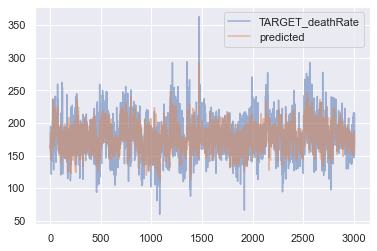

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

cancer_df['predicted'] = linear_tuned.predict(X)
cancer_df[['TARGET_deathRate', 'predicted']].plot(alpha=0.5)

plt.plot()

This model has not been saved as it is not the best model.